<a href="https://colab.research.google.com/github/pavankalyano76/PavanKalyan_INFO5731_Spring2025/blob/main/INFO5731_Assignment_3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [144]:
# Write your code here
def tokenize(text):
  return text.split()

def get_ngrams(words, n):
    ngrams = []
    for i in range(len(words)- n+ 1):
      ngrams.append(tuple(words[i:i+n]))
    return ngrams

def count_ngrams(ngrams):
    counts_dict = {}
    for i in ngrams:
      if i in counts_dict:
        counts_dict[i]+=1
      else:
        counts_dict[i]=1
    return counts_dict

import pandas as pd
df = pd.read_csv('/content/cleaned_Generative_AI_Tweets.csv')
tokens = list()
for i in df['tweetText']:
  words= tokenize(i)
  for j in words:
    tokens.append(j)
bigrams = get_ngrams(tokens,2)
trigrams = get_ngrams(tokens,3)
ngrams = bigrams+trigrams
counts_dict = count_ngrams(ngrams)
bigrams_count = count_ngrams(bigrams)
unigrams_count = count_ngrams(tokens)


def print_top_ngrams(ngrams_dict, n=10):
    sorted_ngrams = sorted(ngrams_dict.items(), key=lambda x: x[1], reverse=True)[:n]
    for ngram, count in sorted_ngrams:
        print(f"{' '.join(ngram)}: {count}")


print("Top 10 Bigrams:")
print_top_ngrams(bigrams_count, 10)


print("\nTop 10 Trigrams:")
print_top_ngrams(trigrams_count, 10)


print('\nBigramProbabilities')

bigramProbability = {}
for bigram, count in bigrams_count.items():
    w1 = bigram[0]
    w1Count = unigrams_count[w1]
    if w1Count > 0:  # Ensure the unigram count is non-zero
        bigramProbability[bigram] = count / w1Count
    else:
        bigramProbability[bigram] = 0  # If unigram count is zero, set probability to 0

bigram_prob_df = pd.DataFrame(list(bigramProbability.items()), columns=['Bigram', 'Probability'])
print(bigram_prob_df)











Top 10 Bigrams:
ai art: 23
art alkaidvision: 23
alkaidvision aiartcommuity: 23
aiartcommuity aiartists: 23
aiartists generativeai: 23
ai generativeai: 14
artificialintelligence generativeai: 12
generativeai data: 12
data cybersecurity: 12
cybersecurity digitaltransformation: 12

Top 10 Trigrams:
ai art alkaidvision: 23
art alkaidvision aiartcommuity: 23
alkaidvision aiartcommuity aiartists: 23
aiartcommuity aiartists generativeai: 23
artificialintelligence generativeai data: 12
generativeai data cybersecurity: 12
data cybersecurity digitaltransformation: 12
cybersecurity digitaltransformation mwc: 12
digitalthread digitaltrust iot: 8
generativeai agenticai digitaltwin: 8

BigramProbabilities
                      Bigram  Probability
0                (image, fx)     1.000000
1          (fx, competitive)     1.000000
2     (competitive, fencing)     0.333333
3      (fencing, tournament)     1.000000
4           (tournament, ai)     1.000000
...                      ...          ...
1187 

In [145]:
import pandas as pd
import re
from collections import defaultdict

file_path = "cleaned_Generative_AI_Tweets.csv"
df = pd.read_csv(file_path)


def extract_noun_phrases(text):
    words = re.findall(r'\b\w+\b', text.lower())
    noun_phrases = []


    for i in range(len(words) - 1):
        if words[i].isalpha() and words[i + 1].isalpha():
            noun_phrases.append(f"{words[i]} {words[i+1]}")
        noun_phrases.append(words[i])

    noun_phrases.append(words[-1])
    return noun_phrases


tweet_noun_phrases = defaultdict(lambda: defaultdict(int))

for index, row in df.iterrows():
    noun_phrases = extract_noun_phrases(row["tweetText"])
    for phrase in noun_phrases:
        tweet_noun_phrases[index][phrase] += 1


max_phrase_freq = defaultdict(int)
for tweet_id, phrases in tweet_noun_phrases.items():
    for phrase, freq in phrases.items():
        max_phrase_freq[phrase] = max(max_phrase_freq[phrase], freq)


relative_probabilities = {}
for tweet_id, phrases in tweet_noun_phrases.items():
    relative_probabilities[tweet_id] = {phrase: freq / max_phrase_freq[phrase] for phrase, freq in phrases.items()}



result_df = pd.DataFrame.from_dict(relative_probabilities, orient="index").fillna(0)

print(result_df)

    image fx  image  fx competitive   fx  competitive fencing  competitive  \
0        1.0    1.0             1.0  1.0                  1.0          1.0   
1        0.0    0.0             0.0  0.0                  0.0          1.0   
51       0.0    0.0             0.0  0.0                  0.0          1.0   
2        0.0    0.0             0.0  0.0                  0.0          0.0   
4        0.0    0.0             0.0  0.0                  0.0          0.0   
..       ...    ...             ...  ...                  ...          ...   
62       0.0    0.0             0.0  0.0                  0.0          0.0   
67       0.0    0.0             0.0  0.0                  0.0          0.0   
68       0.0    0.0             0.0  0.0                  0.0          0.0   
84       0.0    0.0             0.0  0.0                  0.0          0.0   
85       0.0    0.0             0.0  0.0                  0.0          0.0   

    fencing tournament  fencing  tournament ai  tournament  ...

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [148]:
import numpy as np
import pandas as pd
import math

file_path = "/content/cleaned_Generative_AI_Tweets.csv"
df = pd.read_csv(file_path)

documents = df["tweetText"].dropna().tolist()

# Query
query = "Gen AI helping health care"


def preprocess(text):
    return text.lower().split()

doc_tokens = [preprocess(doc) for doc in documents]
query_tokens = preprocess(query)

vocab = sorted(set(word for doc in doc_tokens for word in doc))
vocab_index = {word: i for i, word in enumerate(vocab)}

def compute_tf(tokens, vocab_index):
    tf_vector = np.zeros(len(vocab_index))
    for word in tokens:
        if word in vocab_index:
            tf_vector[vocab_index[word]] += 1
    return tf_vector / len(tokens)

df = np.zeros(len(vocab))
for doc in doc_tokens:
    unique_words = set(doc)
    for word in unique_words:
        df[vocab_index[word]] += 1

idf = np.array([math.log(len(documents) / (df[i] + 1)) + 1 for i in range(len(vocab))])

tfidf_matrix = np.array([compute_tf(doc, vocab_index) * idf for doc in doc_tokens])

query_vector = compute_tf(query_tokens, vocab_index) * idf

def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    return dot_product / (norm1 * norm2) if norm1 != 0 and norm2 != 0 else 0

similarities = [cosine_similarity(query_vector, doc_vector) for doc_vector in tfidf_matrix]

ranked_indices = np.argsort(similarities)[::-1]
ranked_documents = [(i + 1, documents[i], similarities[i]) for i in ranked_indices]

df_result = pd.DataFrame(ranked_documents, columns=["Rank", "Document", "Cosine Similarity"])

df_result = df_result.sort_values(by="Rank", ascending=True)


df_result.head(20)




,Rank,Document,Cosine Similarity
48,1,image fx competitive fencing tournament ai aia...,0.014773
83,2,responsible orgs marketing practice true compe...,0.000000
57,3,connected intelligence boomi lock apis generat...,0.013084
85,4,fascinated fusion art technology explore new g...,0.000000
28,5,microsoft tout muse new generative ai model vi...,0.026047
86,6,youre talentless hack used another human desig...,0.000000
45,7,plan regulated ai future cx artificialintellig...,0.016088
44,8,plan regulated ai future cx artificialintellig...,0.016088
1,9,generative ai revolutionizing healthcare faste...,0.174535
73,10,gai insight talk lot win framework exactly hea...,0.009409


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [149]:
from gensim.models import Word2Vec
import re

df = pd.read_csv('/content/cleaned_Generative_AI_Tweets.csv')
text_data = df['tweetText']


def preprocess_text(text):
    tokens = text.split()
    return tokens

processed_corpus = [preprocess_text(sentence) for sentence in text_data]

word2vec_model = Word2Vec(sentences=processed_corpus, vector_size=300, window=5, min_count=1, workers=4)
word2vec_model.save("word2vec_model.model")



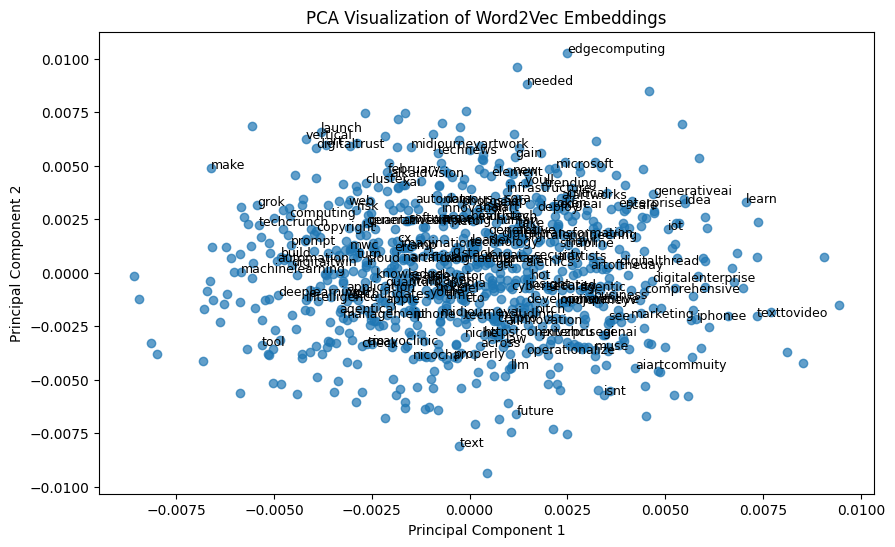

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


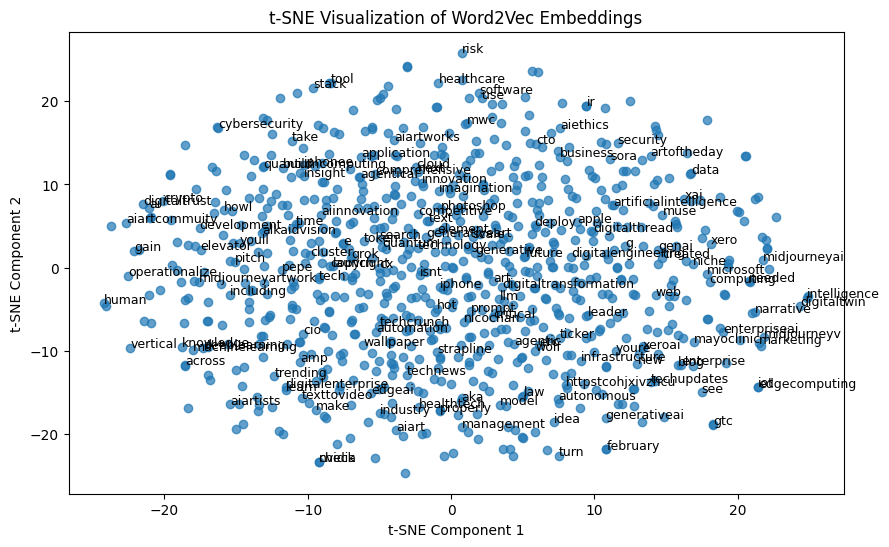

In [150]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

word2vec_model = Word2Vec.load("word2vec_model.model")
words = list(word2vec_model.wv.index_to_key)
word_vectors = np.array([word2vec_model.wv[word] for word in words])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], marker='o', alpha=0.7)


for i, word in enumerate(words[:150]):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), fontsize=9)

plt.title("PCA Visualization of Word2Vec Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], marker='o', alpha=0.7)

for i, word in enumerate(words[:150]):
    plt.annotate(word, xy=(tsne_result[i, 0], tsne_result[i, 1]), fontsize=9)

plt.title("t-SNE Visualization of Word2Vec Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


In [151]:
from sklearn.metrics.pairwise import cosine_similarity

word2vec_model = Word2Vec.load("word2vec_model.model")

def get_cosine_similarity(word1, word2):
    if word1 in word2vec_model.wv and word2 in word2vec_model.wv:
        vec1 = word2vec_model.wv[word1].reshape(1, -1)  # Get vector for word1 and reshape for similarity computation
        vec2 = word2vec_model.wv[word2].reshape(1, -1)  # Get vector for word2 and reshape for similarity computation
        similarity = cosine_similarity(vec1, vec2)[0][0]  # Compute cosine similarity
        return similarity
    else:
        return f"One or both words ('{word1}', '{word2}') not in vocabulary."

word_pairs = [
    ("ai", "machine"),
    ("artificial", "intelligence"),
    ("data", "cybersecurity"),
    ("llm", "learning"),
    ("ai", "computing")
]

for word1, word2 in word_pairs:
    similarity = get_cosine_similarity(word1, word2)
    print(f"Cosine Similarity between '{word1}' and '{word2}': {similarity}")


Cosine Similarity between 'ai' and 'machine': -0.011289809830486774
Cosine Similarity between 'artificial' and 'intelligence': 0.06734149903059006
Cosine Similarity between 'data' and 'cybersecurity': -0.027807720005512238
Cosine Similarity between 'llm' and 'learning': 0.009809635579586029
Cosine Similarity between 'ai' and 'computing': 0.042668167501688004


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [143]:
# The GitHub link of your final csv file


# Link: https://github.com/pavankalyano76/PavanKalyan_INFO5731_Spring2025/blob/main/Assignment3_Q4_sentiment.csv



The dataset is saved as Assignment3_Q4_sentiment in github reporsitory.

Since this dataset is about the twitter tweets, I have decided to take on Sentiment Analysis as the NLP task for this dataset. Helps in determining whether a tweet positively, negatively or neutral is a sentiment. This is pretty useful for analyzing public opinion, trends, and general user feedback of LLMs and AI, for instance, which makes sense since you can summarize why people are blasting others. More importantly, it allows businesses and researchers to understand at scale the audience sentiment.

I used three sentiment classes for labeling, namely positive, negative and neutral. To assign sentiment polarity scores to each tweet, the textBlob was used. tweets can express different sentiments like shown positive (e.g., in topic-based tweets that express enthusiasm), negative (e.g., in tweets that criticize an AI model) or neutral (e.g., in tweets that remain factual) sentiment.

# Mandatory Question


Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment. Share any suggestions for improvement. Your feedback will be valuable for enhancing the learning experience.

The assignment is little challenging coming to the programming and error fix parts but I learned few new things and gained knowledge.